In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Capstone Project/capstone_dataset.csv")
df.head()

,Unnamed: 0,StationId,State,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,AP001,Andhra Pradesh,Amaravati,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,1,AP001,Andhra Pradesh,Amaravati,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,2,AP001,Andhra Pradesh,Amaravati,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,3,AP001,Andhra Pradesh,Amaravati,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,4,AP001,Andhra Pradesh,Amaravati,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [4]:
df['AQI_Bucket'].value_counts()

Moderate        29417
Satisfactory    23636
Very Poor       11762
Poor            11493
Good             5510
Severe           5207
Name: AQI_Bucket, dtype: int64

In [5]:
df['AQI_Bucket'].unique()

array([nan, 'Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good',
       'Severe'], dtype=object)

In [6]:
datetime_str=df['Date'].astype(str)

In [7]:
# import datetime
# from datetime import datetime
# datetime_obj = datetime.strptime(datetime_str, 
#                                  "%m/%d/%Y")
# datetime.strptime(date_string, format)

In [8]:
dfa=df.drop('Date',axis=1)

In [9]:
dfa.head()

,Unnamed: 0,StationId,State,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,AP001,Andhra Pradesh,Amaravati,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,1,AP001,Andhra Pradesh,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,2,AP001,Andhra Pradesh,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,3,AP001,Andhra Pradesh,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,4,AP001,Andhra Pradesh,Amaravati,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate


In [10]:
null_value_percentage=(dfa.isnull().sum()/len(dfa))*100
null_value_percentage = null_value_percentage.sort_values(ascending=False)
null_value_percentage

Xylene        78.805017
NH3           44.527237
PM10          39.529782
Toluene       35.823576
Benzene       29.115564
O3            23.666404
SO2           23.329477
PM2.5         20.016661
AQI           19.447401
AQI_Bucket    19.447401
NO            15.833758
NO2           15.316333
NOx           14.347202
CO            12.031286
StationId      0.000000
City           0.000000
State          0.000000
Unnamed: 0     0.000000
dtype: float64

In [11]:
#outlier treatment
q1=dfa.quantile(0.25)
q3=dfa.quantile(0.75)
iqr=q3-q1
dfiqr = df[~((dfa<( q1 - 1.5 * iqr) ) | (dfa > (q3+1.5*iqr))).any(axis=1)]
dfiqr.head()

,Unnamed: 0,StationId,State,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
14,14,AP001,Andhra Pradesh,Amaravati,2017-12-08,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,0.21,310.0,Very Poor
15,15,AP001,Andhra Pradesh,Amaravati,2017-12-09,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0,Moderate
16,16,AP001,Andhra Pradesh,Amaravati,2017-12-10,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0,Moderate
17,17,AP001,Andhra Pradesh,Amaravati,2017-12-11,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0,Moderate
18,18,AP001,Andhra Pradesh,Amaravati,2017-12-12,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0,Moderate


In [12]:
#Dropping columns which has more than 60% of missing values in the data
for i,j in null_value_percentage.iteritems():
    if (j>60):
        dfiqr.drop(i,axis=1,inplace=True)
dfiqr.columns                


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Unnamed: 0', 'StationId', 'State', 'City', 'Date', 'PM2.5', 'PM10',
       'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene',
       'AQI', 'AQI_Bucket'],
      dtype='object')

In [13]:
dfa=dfiqr[dfiqr['AQI'].isnull()==False]

In [14]:
missing_values=dfa.isnull().sum()/dfa.shape[0]*100

In [15]:
missing_values

Unnamed: 0     0.000000
StationId      0.000000
State          0.000000
City           0.000000
Date           0.000000
PM2.5          5.056809
PM10          29.470917
NO             3.318637
NO2            2.158725
NOx            6.152281
NH3           36.908598
CO             3.693403
SO2           11.198915
O3            12.665762
Benzene       24.875360
Toluene       33.666271
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

In [16]:
for i,j in missing_values.iteritems():
    if j>0:
        dfa[i]=dfa[i].fillna(dfa[i].median())
        print(i)

PM2.5
PM10
NO
NO2
NOx
NH3
CO
SO2
O3
Benzene
Toluene


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [17]:
dfa.isnull().sum()

Unnamed: 0    0
StationId     0
State         0
City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

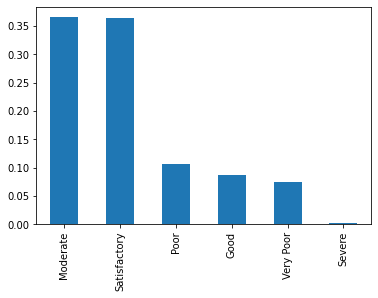

In [18]:
dfa['AQI_Bucket'].value_counts(normalize=True).plot.bar()

# Statistical Test

In [19]:
#Ordinal encoding

In [20]:
dfa.AQI_Bucket.unique()

array(['Very Poor', 'Moderate', 'Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [21]:
# import the OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["Severe", "Very Poor", "Poor", "Moderate","Satisfactory"
                                             ,"Good"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
dfa['AQI_Bucket']= orderencoding.fit_transform(dfa['AQI_Bucket'].values.reshape(-1,1))

# display the data
dfa.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Unnamed: 0,StationId,State,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
14,14,AP001,Andhra Pradesh,Amaravati,2017-12-08,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,310.0,1.0
15,15,AP001,Andhra Pradesh,Amaravati,2017-12-09,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,196.0,3.0
16,16,AP001,Andhra Pradesh,Amaravati,2017-12-10,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,132.0,3.0
17,17,AP001,Andhra Pradesh,Amaravati,2017-12-11,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,147.0,3.0
18,18,AP001,Andhra Pradesh,Amaravati,2017-12-12,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,179.0,3.0


In [22]:
dfa['AQI_Bucket'].unique()

array([1., 3., 2., 4., 5., 0.])

In [23]:
# df_st.drop('Date',axis=1,inplace=True)

In [24]:
df_st=dfa.drop(['StationId','State','City','AQI'],axis=1)

In [25]:
df_st.drop('Date',axis=1,inplace=True)

In [26]:
df_st

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
14,14,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,1.0
15,15,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,3.0
16,16,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,3.0
17,17,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,3.0
18,18,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108029,108029,9.79,19.87,23.51,16.50,40.02,25.09,0.66,10.34,30.19,0.93,6.37,5.0
108030,108030,8.65,16.46,7.74,22.88,22.62,19.54,0.69,4.36,30.59,1.32,7.26,5.0
108031,108031,11.80,18.47,7.74,22.88,22.62,19.54,0.68,3.49,38.95,1.42,7.92,4.0
108033,108033,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,4.0


In [ ]:
df0=df_st[df_st['AQI_Bucket']==0]
df0

In [28]:
df1=df_st[df_st['AQI_Bucket']==1]

In [29]:
df2=df_st[df_st['AQI_Bucket']==2]

In [30]:
df3=df_st[df_st['AQI_Bucket']==3]

In [31]:
df4=df_st[df_st['AQI_Bucket']==4]

In [32]:
df5=df_st[df_st['AQI_Bucket']==5]

# Shapiro -Wilk Normality Test

H0: The data is normally distributed

H1: The data is not normally distributed

In [50]:
from scipy import stats
for var in df0:
    stat, p_value = stats.shapiro(df0[var])
    print("{}: {}: ".format(var,stat))

Unnamed: 0: 0.894582211971283: 
PM2.5: 0.8860644102096558: 
PM10: 0.8641101121902466: 
NO: 0.9249902963638306: 
NO2: 0.955068051815033: 
NOx: 0.9785603880882263: 
NH3: 0.8869819641113281: 
CO: 0.9804408550262451: 
SO2: 0.9392982721328735: 
O3: 0.9530845284461975: 
Benzene: 0.8779817819595337: 
Toluene: 0.7994809746742249: 
AQI_Bucket: 1.0: 


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
from scipy import stats
for var in df1:
    stat, p_value = stats.shapiro(df1[var])
    print("{}: {}: ".format(var,stat))

In [ ]:
from scipy import stats
for var in df2:
    stat, p_value = stats.shapiro(df2[var])
    print("{}: {}: ".format(var,stat))

In [ ]:
from scipy import stats
for var in df3:
    stat, p_value = stats.shapiro(df3[var])
    print("{}: {}: ".format(var,stat))

In [ ]:
from scipy import stats
for var in df4:
    stat, p_value = stats.shapiro(df4[var])
    print("{}: {}: ".format(var,stat))

In [ ]:
from scipy import stats
for var in df5:
    stat, p_value = stats.shapiro(df5[var])
    print("{}: {}: ".format(var,stat))

Here All the values are less than 0.05,Hence we can say that, the data is normally distributed

# pair-plot

In [39]:
# sns.pairplot(df,hue='AQI_Bucket')
# plt.show() #mean distribution is same or not

the distributions are not overlapping so they can predict diffrent output 
thats why these are significant for model building

# Anova -Test

In [40]:
# Numerical columns – We perform parametric and non-parametric tests for the numerical columns. 
# Under parametric test we perform ANOVA 

In [41]:
# Hypothesis for numerical tests
# H0 : samples have the same mean (i.e insignificant)
# H1 : samples have different mean (i.e significant)

In [42]:
df_num=df.select_dtypes(include='number')
df_num

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN
1,1,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2,2,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
3,3,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
4,4,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,108030,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0
108031,108031,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0
108032,108032,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0
108033,108033,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0


In [43]:
 df_num.drop('AQI',axis=1,inplace=True)
df_num.drop('Xylene',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
from scipy import stats
for var in df_num:
  f_test, p_val = stats.f_oneway(df0[var],df1[var],df2[var],df3[var],df4[var],df5[var])
  print("{}: {}: ".format(var,f_test,p_val))
   #the ftest values are far away from the confidence interval of 95
  #the values that y we getting near to .The mean are different distribution

Unnamed: 0: 905.1391130026661: 
PM2.5: 35438.84527071556: 
PM10: 9842.874038547163: 
NO: 1527.9337212294167: 
NO2: 2142.3299753687056: 
NOx: 1838.3043704443082: 
NH3: 1188.8817008287526: 
CO: 2079.6186047988003: 
SO2: 734.791028442854: 
O3: 1224.1995244193731: 
Benzene: 521.7256575304593: 
Toluene: 424.1072448547102: 


In [45]:
from scipy import stats
for var in df_num:
    f_test, p_val = stats.f_oneway(df0[var],df1[var],df2[var],df3[var],df4[var],df5[var])
    print("{}: {}: ".format(var,p_val))

Unnamed: 0: 0.0: 
PM2.5: 0.0: 
PM10: 0.0: 
NO: 0.0: 
NO2: 0.0: 
NOx: 0.0: 
NH3: 0.0: 
CO: 0.0: 
SO2: 0.0: 
O3: 0.0: 
Benzene: 0.0: 
Toluene: 0.0: 


Here we have different mean because of  p_value less than 0.05 and also the f-test values are away
from the confidence interval of 95% values thats y we are getting close to 0.

# Chi2-Test_Test for independence

what is chi2?
it is a proportion test, to check the dependency of the each variables

why we doing chi2?
if these are inependent, we should not consider this variables to build the model

In [46]:
df_st

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket
14,14,122.88,208.86,5.56,54.87,33.71,17.96,0.27,22.97,68.60,0.36,6.28,1.0
15,15,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,3.0
16,16,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,3.0
17,17,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,3.0
18,18,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108029,108029,9.79,19.87,23.51,16.50,40.02,25.09,0.66,10.34,30.19,0.93,6.37,5.0
108030,108030,8.65,16.46,7.74,22.88,22.62,19.54,0.69,4.36,30.59,1.32,7.26,5.0
108031,108031,11.80,18.47,7.74,22.88,22.62,19.54,0.68,3.49,38.95,1.42,7.92,4.0
108033,108033,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,4.0


In [47]:
df_cat=df.select_dtypes(include='object')

In [48]:
df_cat['City'].nunique()

26

In [49]:
table =pd.crosstab(df_cat["AQI_Bucket"],df_cat["City"],normalize='columns')
obs_value=table.values

from scipy.stats import chi2_contingency

test_stat,p_value, dof, expected_value=chi2_contingency(observed=obs_value, correction =False)
print('the p value is : ',p_value, test_stat)
pd.DataFrame({'Features': df_cat.columns[2:3], 'p_value': p_value})

the p value is :  1.0 21.84376609050849


,Features,p_value
0,City,1.0


when,
If H0=p_value<0.05, 
If Ha=p_value>=0.05
Then,
H0 is accepted then the variables are independent
Ha is accepted  the variables are  dependent
    
    since the p_value is greater than 0.05 we accept the null hypothesis
    
    Therefore by this test we conclude that 'City' is independent to predict
    our AQI_Bucket